### [TimeXer for Time Series Forecasting](https://medium.com/the-forecaster/timexer-for-time-series-forecasting-with-exogenous-features-f364c113da62)

**_TimeXer_** is a transformer-based model, just like PatchTST and iTransformer, that also take into account exogenous features. Thus, it does not only rely on past values of the series, but also on external information that may help forecast our target.

*TimeXer* is a transformer-based model. The motivation behind TimeXer comes from the realization that current transformer-based models lack some key capabilities.

In [1]:
%set_env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install -q pandas numpy matplotlib
!pip install -q neuralforecast utilsforecast

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import TimeXer, NHITS, TSMixerx

import utilsforecast.processing as ufp

from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mae, mse

In [5]:
BE_url = "https://raw.githubusercontent.com/thuml/TimeXer/refs/heads/main/dataset/EPF/BE.csv"
DE_url = "https://raw.githubusercontent.com/thuml/TimeXer/refs/heads/main/dataset/EPF/DE.csv"

BE_df = pd.read_csv(BE_url, parse_dates=["date"])
BE_df["unique_id"] = "BE"
BE_df = BE_df.rename(columns={
    "date": "ds",
    " Generation forecast": "Generation forecast",
    " System load forecast": "System load forecast",
    "OT": "y"
})
DE_df = pd.read_csv(DE_url, parse_dates=["date"])
DE_df["unique_id"] = "DE"
DE_df = DE_df.rename(columns={
    "date": "ds",
    " Wind power forecast": "Wind power forecast",
    " Ampirion zonal load forecast": "Ampirion zonal load forecast",
    "OT": "y"
})

In [6]:
HORIZON = 24
INPUT_SIZE = 168
FREQ = "h"
BE_EXOG_LIST = ["Generation forecast", "System load forecast"]
DE_EXOG_LIST = ["Wind power forecast", "Ampirion zonal load forecast"]

#### BE dataset (Belgium)

In [7]:
models = [
    TimeXer(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=BE_EXOG_LIST,
        patch_len=HORIZON,
        max_steps=1000
    ),
    NHITS(
        h=HORIZON,
        input_size=INPUT_SIZE,
        futr_exog_list=BE_EXOG_LIST,
        max_steps=1000
    ),
    TSMixerx(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=BE_EXOG_LIST,
        max_steps=1000
    )
]
nf = NeuralForecast(models=models, freq=FREQ)
BE_cv_preds = nf.cross_validation(BE_df, step_size=HORIZON, n_windows=10)
BE_cv_preds.head()

Seed set to 1
Seed set to 1
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type                   | Params | Mode 
----------------------------------------------------------------
0 | loss         | MAE                    | 0      | train
1 | padder_train | ConstantPad1d          | 0      | train
2 | scaler       | TemporalNorm           | 0      | train
3 | en_embedding | EnEmbedding            | 12.8 K | train
4 | ex_embedding | DataEmbedding_inverted | 86.5 K | train
5 | encoder      | Encoder                | 8.4 M  | train
6 | head         | FlattenHead            | 98.3 K | train
----------------------------------------------------------------
8.6 M     Trainable params
0         Non-trainable params
8.6 M     Total params
34.427    Total estimated model params size (MB)
59        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 3.2 M  | train
-------------------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.843    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                | Type              | Params | Mode 
------------------------------------------------------------------
0 | loss                | MAE               | 0      | train
1 | padder_train        | ConstantPad1d     | 0      | train
2 | scaler              | TemporalNorm      | 0      | train
3 | norm                | RevINMultivariate | 2      | train
4 | temporal_projection | Linear            | 4.1 K  | train
5 | feature_mixer_hist  | FeatureMixing     | 7.7 K  | train
6 | feature_mixer_futr  | FeatureMixing     | 7.6 K  | train
7 | first_mixing        | MixingLayer       | 30.5 K | train
8 | mixing_block        | Sequential        | 30.1 K | train
9 | out                 | Linear            | 65     | train
------------------------------------------------------------------
80.1 K    Trainable params
0         Non-trainable params
80.1 K    Total params
0.

Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

,unique_id,ds,cutoff,TimeXer,NHITS,TSMixerx,y
0,BE,2016-12-22 00:00:00,2016-12-21 23:00:00,50.855751,54.467297,52.945583,45.18
1,BE,2016-12-22 01:00:00,2016-12-21 23:00:00,48.706043,54.405758,49.712704,41.80
2,BE,2016-12-22 02:00:00,2016-12-21 23:00:00,45.986900,54.093018,51.250599,40.24
3,BE,2016-12-22 03:00:00,2016-12-21 23:00:00,44.343689,53.712624,48.940655,40.34
4,BE,2016-12-22 04:00:00,2016-12-21 23:00:00,46.371185,53.362377,46.191071,41.12


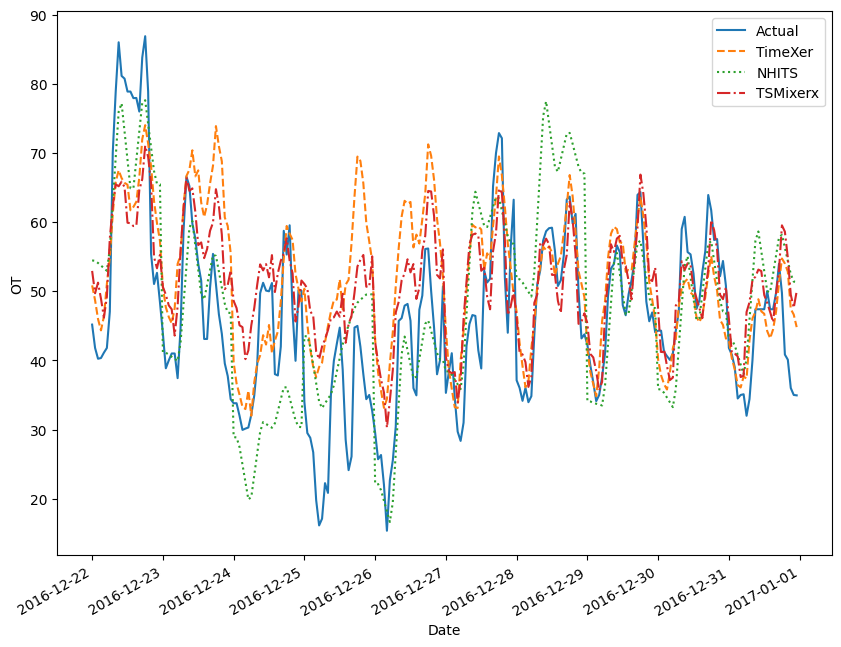

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(BE_cv_preds["ds"], BE_cv_preds["y"], label="Actual")
ax.plot(BE_cv_preds["ds"], BE_cv_preds["TimeXer"], label="TimeXer", ls="--")
ax.plot(BE_cv_preds["ds"], BE_cv_preds["NHITS"], label="NHITS", ls=":")
ax.plot(BE_cv_preds["ds"], BE_cv_preds["TSMixerx"], label="TSMixerx", ls="-.")
ax.set_xlabel("Date")
ax.set_ylabel("OT")
ax.legend()

fig.autofmt_xdate()

In [9]:
evaluation = evaluate(BE_cv_preds, metrics=[mae, mse], models=["NHITS", "TSMixerx", "TimeXer"])
evaluation

,unique_id,metric,NHITS,TSMixerx,TimeXer
0,BE,mae,8.486782,7.994096,8.810015
1,BE,mse,106.577923,99.674284,126.389098


#### DE dataset (Denmark)

In [10]:
models = [
    TimeXer(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=DE_EXOG_LIST,
        patch_len=HORIZON,
        max_steps=1000
    ),
    NHITS(
        h=HORIZON,
        input_size=INPUT_SIZE,
        futr_exog_list=DE_EXOG_LIST,
        max_steps=1000
    ),
    TSMixerx(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=DE_EXOG_LIST,
        max_steps=1000
    )
]
nf = NeuralForecast(models=models, freq=FREQ)
DE_cv_preds = nf.cross_validation(DE_df, step_size=HORIZON, n_windows=10)
DE_cv_preds.head()

Seed set to 1
Seed set to 1
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type                   | Params | Mode 
----------------------------------------------------------------
0 | loss         | MAE                    | 0      | train
1 | padder_train | ConstantPad1d          | 0      | train
2 | scaler       | TemporalNorm           | 0      | train
3 | en_embedding | EnEmbedding            | 12.8 K | train
4 | ex_embedding | DataEmbedding_inverted | 86.5 K | train
5 | encoder      | Encoder                | 8.4 M  | train
6 | head         | FlattenHead            | 98.3 K | train
----------------------------------------------------------------
8.6 M     Trainable params
0         Non-trainable params
8.6 M     Total params
34.427    Total estimated model params size (MB)
59        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 3.2 M  | train
-------------------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.843    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                | Type              | Params | Mode 
------------------------------------------------------------------
0 | loss                | MAE               | 0      | train
1 | padder_train        | ConstantPad1d     | 0      | train
2 | scaler              | TemporalNorm      | 0      | train
3 | norm                | RevINMultivariate | 2      | train
4 | temporal_projection | Linear            | 4.1 K  | train
5 | feature_mixer_hist  | FeatureMixing     | 7.7 K  | train
6 | feature_mixer_futr  | FeatureMixing     | 7.6 K  | train
7 | first_mixing        | MixingLayer       | 30.5 K | train
8 | mixing_block        | Sequential        | 30.1 K | train
9 | out                 | Linear            | 65     | train
------------------------------------------------------------------
80.1 K    Trainable params
0         Non-trainable params
80.1 K    Total params
0.

Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

,unique_id,ds,cutoff,TimeXer,NHITS,TSMixerx,y
0,DE,2017-12-22 00:00:00,2017-12-21 23:00:00,41.412392,35.231499,35.879585,27.76
1,DE,2017-12-22 01:00:00,2017-12-21 23:00:00,36.056465,34.495033,35.624672,26.45
2,DE,2017-12-22 02:00:00,2017-12-21 23:00:00,34.018150,33.601955,34.166939,26.20
3,DE,2017-12-22 03:00:00,2017-12-21 23:00:00,29.903639,32.800930,36.588665,26.36
4,DE,2017-12-22 04:00:00,2017-12-21 23:00:00,27.246714,31.709415,37.320969,27.59


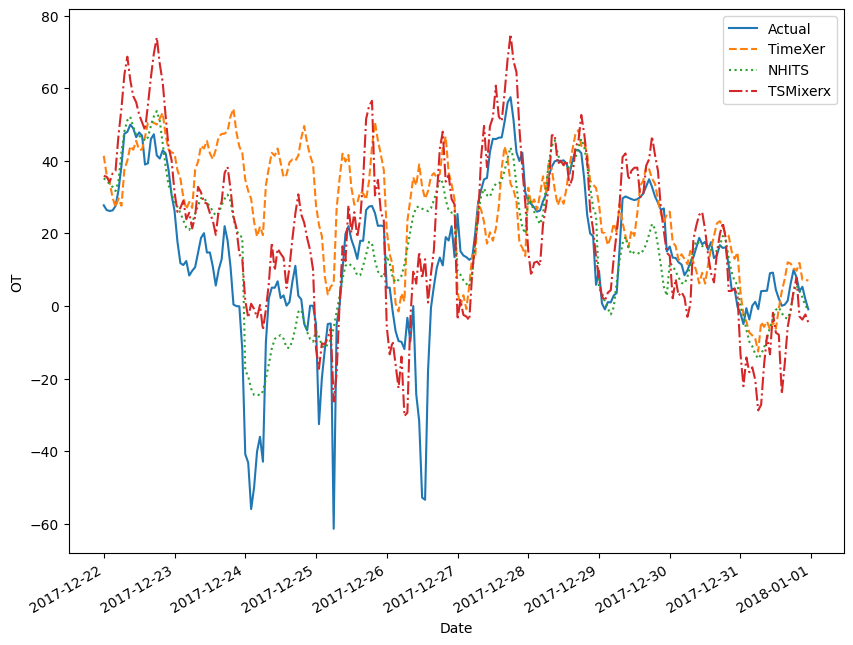

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(DE_cv_preds["ds"], DE_cv_preds["y"], label="Actual")
ax.plot(DE_cv_preds["ds"], DE_cv_preds["TimeXer"], label="TimeXer", ls="--")
ax.plot(DE_cv_preds["ds"], DE_cv_preds["NHITS"], label="NHITS", ls=":")
ax.plot(DE_cv_preds["ds"], DE_cv_preds["TSMixerx"], label="TSMixerx", ls="-.")
ax.set_xlabel("Date")
ax.set_ylabel("OT")
ax.legend()

fig.autofmt_xdate()

In [12]:
evaluation = evaluate(DE_cv_preds, metrics=[mae, mse], models=["NHITS", "TSMixerx", "TimeXer"])
evaluation

,unique_id,metric,NHITS,TSMixerx,TimeXer
0,DE,mae,10.336789,12.636699,18.428219
1,DE,mse,227.086479,271.738939,651.388491
